In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [17]:
data_ob = pd.read_csv('../datas/ObesityDataSet.csv', sep=',')
data_ob.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


- FAVC: Consumo frecuente de alimentos ricos en calorías
- FCVC: Frecuencia de consumo de verduras
- NCP: Número de comidas principales
- CAEC: Consumo de alimentos entre comidas
- SMOKE: Fuma (Si o No)  
- CH2O: Consumo de agua diario  
- SCC: Seguimiento del consumo de calorías  
- FAF: Frecuencia de actividad física  
- TUE: Tiempo usando dispositivos tecnológicos  
- CALC: Consumo de alcohol  MTRANS: Transporte usado

In [18]:
data_ob['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [19]:
data_cols = data_ob.select_dtypes(exclude='object').columns
len(data_cols)

8

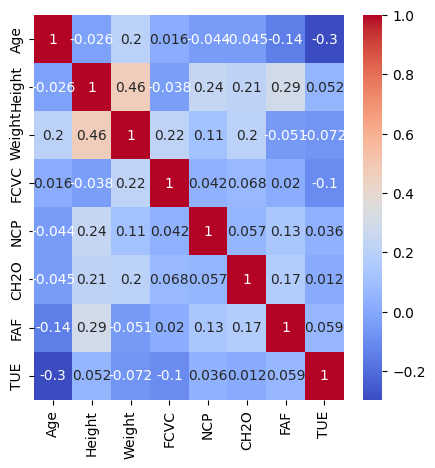

In [20]:
matriz = data_ob[data_cols].corr()
fig = plt.figure(figsize=(5,5))
sns.heatmap(matriz, annot=True, cmap='coolwarm')
plt.show()


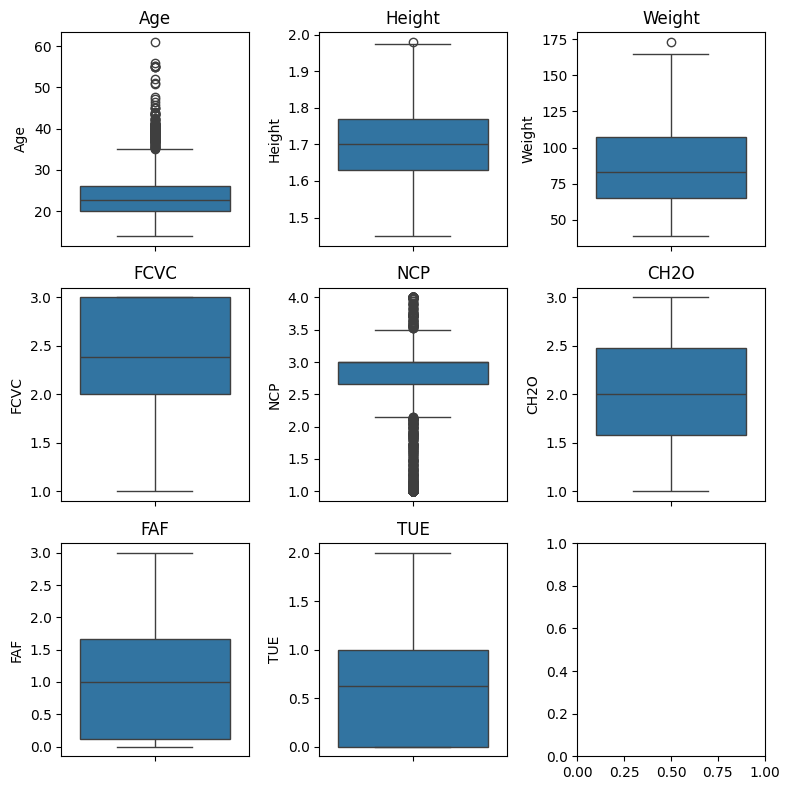

In [21]:
#observando los outliers
num_plots = len(data_cols)
rows = 3
cols = num_plots // rows + (num_plots % rows > 0)

fig, axes = plt.subplots(rows, cols, figsize=(8,8))

for i, col in enumerate(data_cols):
    ax = axes[i//cols, i%cols] if rows > 1 else axes[i%cols]
    sns.boxplot(data=data_ob, y=col, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()


In [22]:
#Género de personal con mayor edad
data_ob.iloc[data_ob['Age'].idxmax(), 0]

'Female'

In [23]:
#Separando las variables independientes y dependiente
x = data_ob[['Height', 'FAF', 'FCVC', 'NCP']].values
y = data_ob[['Weight']]

In [24]:
print(x.shape)
print(y.shape)

(2111, 4)
(2111, 1)


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

sc_x = StandardScaler()
sc_y = StandardScaler()

x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [26]:
#coeficiente de determinación
prediccion = model.predict(x_test)
r2 = r2_score(y_test, prediccion)
print(round(r2, 2))

0.31


In [27]:
#Generando la predicción
talla = 1.74
FAF = 4
FCVC = 3
NCP = 3

dato_esc = sc_x.transform(np.array([[talla, FAF, FCVC, NCP]]))
dato_std = model.predict(dato_esc)
prediccion = sc_y.inverse_transform(dato_std)
print('El peso de una persona de {} mts. y de un FAF de {} es de {} kg.'.format(talla, FAF, np.around(prediccion[0][0], 2)))

El peso de una persona de 1.74 mts. y de un FAF de 4 es de 79.25 kg.
